Saving cleaned_weather.csv to cleaned_weather.csv


<ipython-input-2-628a0bb833c2>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['T'].resample('M').mean()
<ipython-input-2-628a0bb833c2>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=monthly_temp.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')


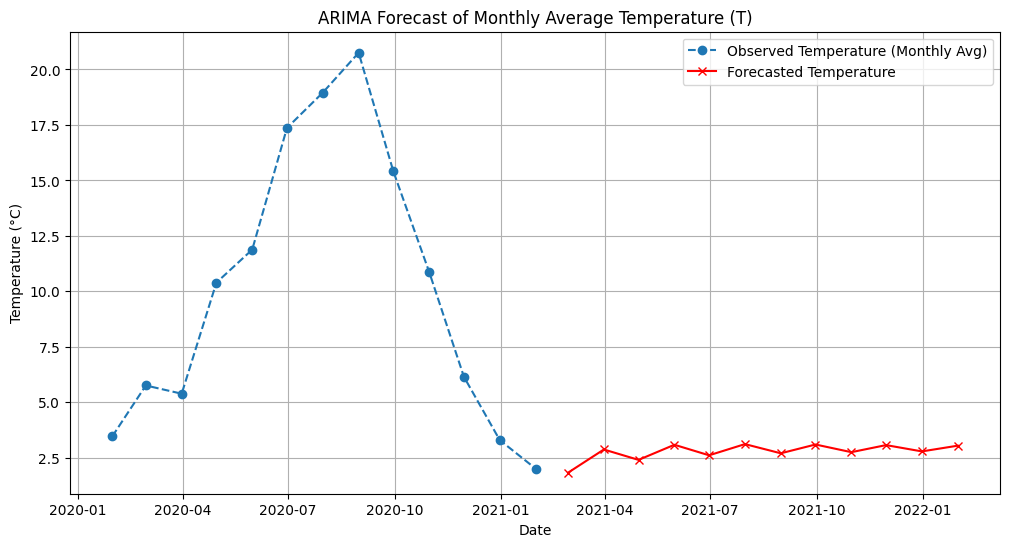

         date  forecasted_temperature
0  2021-02-28                1.825342
1  2021-03-31                2.872076
2  2021-04-30                2.404227
3  2021-05-31                3.085160
4  2021-06-30                2.610654
5  2021-07-31                3.114986
6  2021-08-31                2.700911
7  2021-09-30                3.097031
8  2021-10-31                2.751553
9  2021-11-30                3.069982
10 2021-12-31                2.786089
11 2022-01-31                3.044291


In [2]:
# STEP 1: Upload the file
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# STEP 3: Load dataset
df = pd.read_csv("cleaned_weather.csv")

# STEP 4: Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# STEP 5: Set 'date' as index
df.set_index('date', inplace=True)

# STEP 6: Resample temperature column ('T') to monthly average
monthly_temp = df['T'].resample('M').mean()
monthly_temp.dropna(inplace=True)

# STEP 7: Fit ARIMA model (can tune order)
model = ARIMA(monthly_temp, order=(2, 1, 2))
model_fit = model.fit()

# STEP 8: Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# STEP 9: Create forecast dates
forecast_dates = pd.date_range(start=monthly_temp.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# STEP 10: Build forecast DataFrame
forecast_df = pd.DataFrame({
    'date': forecast_dates,
    'forecasted_temperature': forecast.values
})

# STEP 11: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_temp.index, monthly_temp, label="Observed Temperature (Monthly Avg)", marker='o', linestyle='--')
plt.plot(forecast_df['date'], forecast_df['forecasted_temperature'], label="Forecasted Temperature", color='red', marker='x')
plt.title("ARIMA Forecast of Monthly Average Temperature (T)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()

# STEP 12: Display forecasted values
print(forecast_df)
